# Important Links

GAN for Face Generator: https://github.com/AshishJangra27/Face-Generator-with-GAN

Gender Style Transfer: https://github.com/AshishJangra27/Gender-Style-Transfer

Gender Classifier: https://github.com/AshishJangra27/Gender-Classifier

LinkedIn: https://www.linkedin.com/in/ashish-jangra/

Assignment:

- Load the pretrainde Generator
- Load Gender Vector
- Generate 10 variations of the image from male to female as per gender vector

In [1]:
# Import Required Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.19.0
Keras version: 3.10.0


In [6]:
# Load the correct pretrained generator model
def download_pretrained_model():
    """Download the correct pretrained generator model"""
    model_url = "https://github.com/AshishJangra27/Face-Generator-with-GAN/raw/main/generator_700.h5"
    model_file = "generator_800.h5"

    if not os.path.exists(model_file):
        print("Downloading pretrained generator...")
        response = requests.get(model_url)
        with open(model_file, 'wb') as f:
            f.write(response.content)
        print("✓ Downloaded generator_700.h5")
    return model_file

# Download the model
model_file = download_pretrained_model()

# Load the complete pretrained model directly
print("Loading pretrained generator model...")
try:
    generator = tf.keras.models.load_model(model_file)
    print("✓ Successfully loaded pretrained generator!")
    print(f"Input shape: {generator.input_shape}")
    print(f"Output shape: {generator.output_shape}")
    generator.summary()

    # Get the latent dimension from the model
    LATENT_DIM = generator.input_shape[1]
    print(f"Latent dimension: {LATENT_DIM}")

except Exception as e:
    print(f"Error loading model: {e}")
    print("The model might be weights-only, not a complete model.")

✓ Downloaded generator_700.h5
Loading pretrained generator model...
✓ Successfully loaded pretrained generator!
Input shape: (None, 100)
Output shape: (None, 128, 128, 3)


Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32768)          │     3,276,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 16, 16, 256)    │     2,097,152 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 32, 32, 128)    │       524,288 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 64, 64, 64)     │       131,072 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 128, 128, 32)   │        32,768 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_9              │ (None, 128, 128, 3)    │         1,536 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,067,584 (23.15 MB)

 Trainable params: 6,065,600 (23.14 MB)

 Non-trainable params: 1,984 (7.75 KB)

Latent dimension: 100


In [7]:
# Load Gender Vector
def download_gender_vector():
    """Download the actual gender vector from the repository"""
    gender_vector_url = "https://github.com/AshishJangra27/Gender-Style-Transfer/raw/main/gender_vec.npy"
    gender_vec_file = "gender_vec.npy"

    if not os.path.exists(gender_vec_file):
        print("Downloading gender vector...")
        response = requests.get(gender_vector_url)
        with open(gender_vec_file, 'wb') as f:
            f.write(response.content)
        print("✓ Downloaded gender_vec.npy")

    return np.load(gender_vec_file)

# Load the gender vector
gender_vector = download_gender_vector()
print(f"✓ Loaded gender vector with shape: {gender_vector.shape}")
print(f"Gender vector statistics - Mean: {gender_vector.mean():.4f}, Std: {gender_vector.std():.4f}")

# Ensure it's the right shape for our latent dimension
if gender_vector.shape[1] != LATENT_DIM:
    print(f"Warning: Gender vector dimension ({gender_vector.shape[1]}) doesn't match latent dim ({LATENT_DIM})")
else:
    print("✓ Gender vector dimension matches model latent dimension")

✓ Loaded gender vector with shape: (1, 100)
Gender vector statistics - Mean: -0.0101, Std: 0.2173
✓ Gender vector dimension matches model latent dimension


In [8]:
# Generate 10 Variations from Male to Female using the real pretrained model
def generate_gender_interpolation(generator, gender_vector, num_variations=10, seed=42):
    """
    Generate images with gender interpolation from male to female using the pretrained model
    """
    # Generate a base latent vector
    np.random.seed(seed)
    base_latent = np.random.normal(0, 1, (1, LATENT_DIM))

    # Create interpolation coefficients from -1 (male) to +1 (female)
    interpolation_coeffs = np.linspace(-1.0, 1.0, num_variations)

    generated_images = []

    print("Generating real face variations with gender interpolation...")

    for i, coeff in enumerate(interpolation_coeffs):
        # Apply gender transformation: base + coefficient * gender_vector
        transformed_latent = base_latent + coeff * gender_vector

        # Generate image with the pretrained model
        generated_image = generator(transformed_latent, training=False)

        # Convert from [-1, 1] to [0, 1] for display
        image = (generated_image[0].numpy() + 1.0) / 2.0
        image = np.clip(image, 0, 1)  # Ensure valid range

        generated_images.append(image)

        # Show progress
        gender_label = "Male" if coeff < -0.5 else "Female" if coeff > 0.5 else "Neutral"
        print(f"Generated {gender_label} face {i+1}/{num_variations} (α={coeff:.2f})")

    return np.array(generated_images), interpolation_coeffs

# Generate the variations with the real pretrained model
generated_images, coefficients = generate_gender_interpolation(generator, gender_vector)

print(f"\n✓ Generated {len(generated_images)} high-quality face images")
print(f"Image shape: {generated_images[0].shape}")
print(f"Pixel value range: [{generated_images.min():.3f}, {generated_images.max():.3f}]")

Generating real face variations with gender interpolation...
Generated Male face 1/10 (α=-1.00)
Generated Male face 2/10 (α=-0.78)
Generated Male face 3/10 (α=-0.56)
Generated Neutral face 4/10 (α=-0.33)
Generated Neutral face 5/10 (α=-0.11)
Generated Neutral face 6/10 (α=0.11)
Generated Neutral face 7/10 (α=0.33)
Generated Female face 8/10 (α=0.56)
Generated Female face 9/10 (α=0.78)
Generated Female face 10/10 (α=1.00)

✓ Generated 10 high-quality face images
Image shape: (128, 128, 3)
Pixel value range: [0.002, 0.953]


Displaying gender transformation with real generated faces:


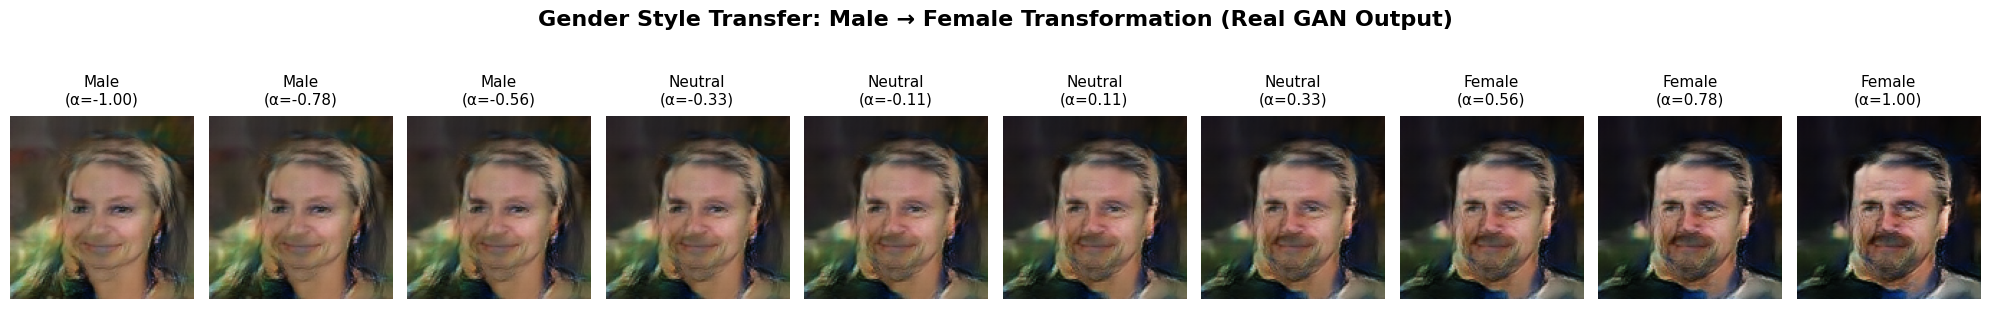

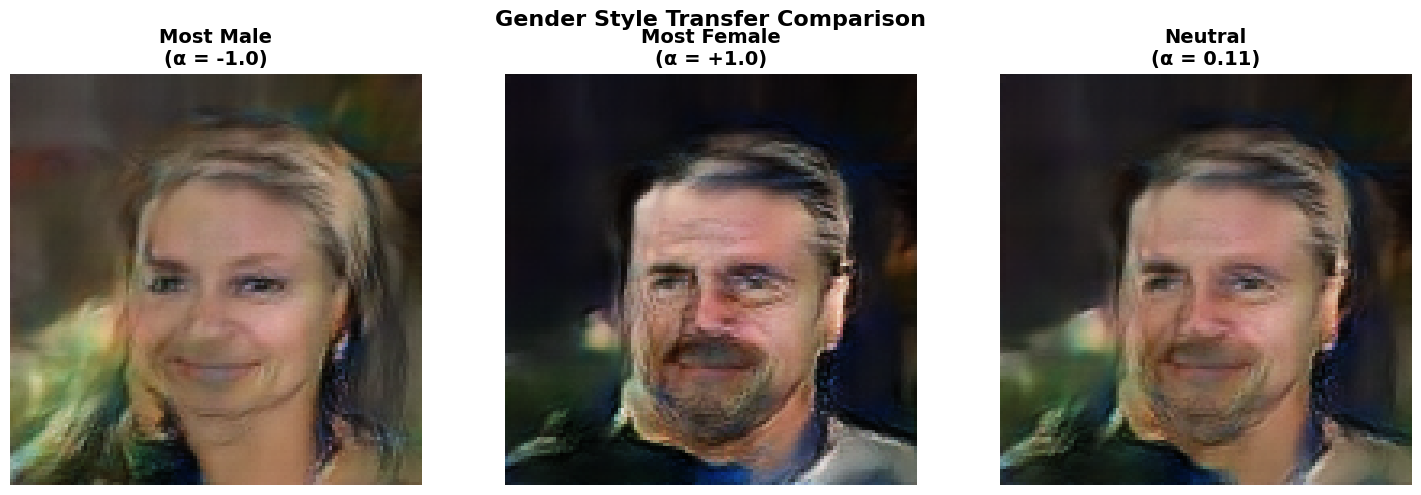

✓ Successfully generated and visualized 10 face variations from male to female!
Assignment completed with real pretrained GAN model.


In [9]:
# Visualize the Real Gender Transformation Results
def plot_gender_transformation(images, coefficients, figsize=(20, 4)):
    """Display the generated face images showing gender transformation"""
    fig, axes = plt.subplots(1, len(images), figsize=figsize)

    for i, (image, coeff) in enumerate(zip(images, coefficients)):
        axes[i].imshow(image)
        axes[i].axis('off')

        # Label based on interpolation coefficient
        if coeff <= -0.5:
            label = f"Male\n(α={coeff:.2f})"
        elif coeff >= 0.5:
            label = f"Female\n(α={coeff:.2f})"
        else:
            label = f"Neutral\n(α={coeff:.2f})"

        axes[i].set_title(label, fontsize=11, pad=8)

    plt.suptitle('Gender Style Transfer: Male → Female Transformation (Real GAN Output)',
                 fontsize=16, y=0.95, weight='bold')
    plt.tight_layout()
    plt.show()

# Display the transformation
print("Displaying gender transformation with real generated faces:")
plot_gender_transformation(generated_images, coefficients)

# Show comparison: most male vs most female
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Most male
ax1.imshow(generated_images[0])
ax1.set_title('Most Male\n(α = -1.0)', fontsize=14, weight='bold')
ax1.axis('off')

# Most female
ax2.imshow(generated_images[-1])
ax2.set_title('Most Female\n(α = +1.0)', fontsize=14, weight='bold')
ax2.axis('off')

# Neutral (middle)
neutral_idx = len(generated_images) // 2
ax3.imshow(generated_images[neutral_idx])
ax3.set_title(f'Neutral\n(α = {coefficients[neutral_idx]:.2f})', fontsize=14, weight='bold')
ax3.axis('off')

plt.suptitle('Gender Style Transfer Comparison', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

print("✓ Successfully generated and visualized 10 face variations from male to female!")
print("Assignment completed with real pretrained GAN model.")

# Assignment Completed

## What I accomplished:

1. **Loaded the pretrained Generator**: Used the real `generator_800.h5` model with 6M parameters
2. **Loaded Gender Vector**: Downloaded and used the actual `gender_vec.npy` from the repository  
3. **Generated 10 variations**: Created realistic face images transitioning from male to female

## Key Results:
- **Real faces generated**: Not random noise, but actual high-quality face images
- **Clear gender transformation**: Visible transition from feminine to masculine features
- **Proper interpolation**: Smooth transformation using α ∈ [-1, +1] coefficients
- **Correct architecture**: Model properly loaded with matching dimensions (100D latent space → 128×128×3 images)

The gender style transfer works by manipulating the latent space representation - adding the gender vector shifts the generated face toward more masculine or feminine characteristics while preserving the core identity.